# Evaluating Machine Learning Models

### In this notebook we analyse the gas pipeline dataset using baseline machine learning models

In [2]:
#Importing all the necessary libraries 

import requests
from scipy.io import arff
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
#Downloading the dataset from the website 
url = "http://www.ece.uah.edu/~thm0009/icsdatasets/IanArffDataset.arff"
response = requests.get(url)

In [4]:
with open("gas_final.arff", "wb") as file:
    file.write(response.content)


In [5]:
#Loading the dataset in a arff format 
arff_file_path = "gas_final.arff"  
data, meta = arff.loadarff(arff_file_path)

In [20]:
#Loading the dataset 
df = pd.DataFrame(data)

In [21]:
#Converting the dataset to a csv format 
csv_file_path = "gas_final.csv"  
df.to_csv(csv_file_path, index=False)

print(f"CSV file saved at: {csv_file_path}")

CSV file saved at: gas_final.csv


In [22]:
#Displaying a couple of rows of the dataset
print(df.head(10))

   address  function  length  setpoint   gain  reset rate  deadband  \
0      4.0       3.0    16.0       NaN    NaN         NaN       NaN   
1      4.0       3.0    46.0       NaN    NaN         NaN       NaN   
2      4.0      16.0    90.0      10.0  115.0         0.2       0.5   
3      4.0      16.0    16.0       NaN    NaN         NaN       NaN   
4      4.0       3.0    16.0       NaN    NaN         NaN       NaN   
5      4.0       3.0    46.0       NaN    NaN         NaN       NaN   
6      4.0      16.0    90.0      10.0  115.0         0.2       0.5   
7      4.0      16.0    16.0       NaN    NaN         NaN       NaN   
8      4.0       3.0    16.0       NaN    NaN         NaN       NaN   
9      4.0       3.0    46.0       NaN    NaN         NaN       NaN   

   cycle time  rate  system mode  control scheme  pump  solenoid  \
0         NaN   NaN          NaN             NaN   NaN       NaN   
1         NaN   NaN          NaN             NaN   NaN       NaN   
2         1.0 

In [23]:
print(df.columns.tolist())

['address', 'function', 'length', 'setpoint', 'gain', 'reset rate', 'deadband', 'cycle time', 'rate', 'system mode', 'control scheme', 'pump', 'solenoid', 'pressure measurement', 'crc rate', 'command response', 'time', 'binary result', 'categorized result', 'specific result']


In [28]:
print(df.dtypes)

address                 float64
function                float64
length                  float64
setpoint                float64
gain                    float64
reset rate              float64
deadband                float64
cycle time              float64
rate                    float64
system mode             float64
control scheme          float64
pump                    float64
solenoid                float64
pressure measurement    float64
crc rate                float64
command response         object
time                    float64
binary result            object
categorized result       object
specific result          object
dtype: object


In [29]:
#Checking the number of null values in the dataset
print(df.isnull().sum())

address                      0
function                     0
length                       0
setpoint                210528
gain                    210528
reset rate              210528
deadband                210528
cycle time              210528
rate                    210528
system mode             210528
control scheme          210528
pump                    210528
solenoid                210528
pressure measurement    205740
crc rate                     0
command response             0
time                         0
binary result                0
categorized result           0
specific result              0
dtype: int64


In [30]:
#Describing the data
print(df.describe(include="all").transpose())

                         count unique   top    freq  \
address               274628.0    NaN   NaN     NaN   
function              274628.0    NaN   NaN     NaN   
length                274628.0    NaN   NaN     NaN   
setpoint               64100.0    NaN   NaN     NaN   
gain                   64100.0    NaN   NaN     NaN   
reset rate             64100.0    NaN   NaN     NaN   
deadband               64100.0    NaN   NaN     NaN   
cycle time             64100.0    NaN   NaN     NaN   
rate                   64100.0    NaN   NaN     NaN   
system mode            64100.0    NaN   NaN     NaN   
control scheme         64100.0    NaN   NaN     NaN   
pump                   64100.0    NaN   NaN     NaN   
solenoid               64100.0    NaN   NaN     NaN   
pressure measurement   68888.0    NaN   NaN     NaN   
crc rate              274628.0    NaN   NaN     NaN   
command response        274628      2  b'1'  137615   
time                  274628.0    NaN   NaN     NaN   
binary res

In [24]:
#Printing the number of labelled outputs from all the target columns 
results_counts = df['binary result'].value_counts()

In [25]:
print(results_counts)

binary result
b'0'    214580
b'1'     60048
Name: count, dtype: int64


In [26]:
results_counts_cat = df['categorized result'].value_counts()
print(results_counts_cat)

categorized result
b'0'    214580
b'4'     20412
b'2'     13035
b'3'      7900
b'1'      7753
b'5'      4898
b'7'      3874
b'6'      2176
Name: count, dtype: int64


In [27]:
results_counts_spe = df['specific result'].value_counts()
print(results_counts_spe)

specific result
b'0'     214580
b'35'      2204
b'18'      2176
b'30'      2120
b'27'      2079
b'12'      2072
b'23'      2048
b'6'       2026
b'34'      2010
b'4'       1932
b'31'      1906
b'32'      1871
b'28'      1858
b'29'      1856
b'11'      1834
b'26'      1808
b'8'       1798
b'1'       1792
b'21'      1722
b'3'       1700
b'14'      1676
b'16'      1658
b'19'      1634
b'33'      1604
b'13'      1594
b'15'      1558
b'22'      1542
b'7'       1512
b'10'      1474
b'25'      1472
b'2'       1460
b'5'       1416
b'17'      1414
b'9'       1396
b'24'      1160
b'20'       666
Name: count, dtype: int64


## Pre Processing 

In [7]:
#Importing libraries 
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [12]:
#Defining the features and our target column 
features = ['address', 'length', 'gain', 'deadband', 'rate', 'control scheme',
            'solenoid', 'crc rate', 'time', 'function', 'setpoint',
            'reset rate', 'cycle time', 'system mode', 'pump', 'pressure measurement']
target = 'categorized result'


In [39]:
print(df.columns.tolist())

['address', 'function', 'length', 'setpoint', 'gain', 'reset rate', 'deadband', 'cycle time', 'rate', 'system mode', 'control scheme', 'pump', 'solenoid', 'pressure measurement', 'crc rate', 'command response', 'time', 'binary result', 'categorized result', 'specific result']


In [40]:
#Handle Missing Values (Imputation)
imputer = KNNImputer(n_neighbors=5)
df[features] = imputer.fit_transform(df[features])

In [41]:
#Encoding Target Variable
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

In [42]:
#Splitting Data into Training and Testing Sets
train_data, test_data = train_test_split(df, test_size=0.33, random_state=42, stratify=df[target])

In [43]:
#Save Train and Test Data
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [13]:
#loading the Trainning data and Evaluating Model
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]


In [63]:
#Training Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
y_pred = rf_model.predict(X_test)

In [67]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     70812
           1       0.88      0.78      0.83      2559
           2       0.93      0.81      0.86      4302
           3       0.87      0.78      0.82      2607
           4       0.87      0.81      0.84      6736
           5       0.99      1.00      0.99      1616
           6       0.85      0.80      0.82       718
           7       1.00      0.99      0.99      1278

    accuracy                           0.95     90628
   macro avg       0.92      0.87      0.89     90628
weighted avg       0.95      0.95      0.95     90628



In [68]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[69641    27    62   243   764     0    75     0]
 [  362  1988   209     0     0     0     0     0]
 [  583   243  3476     0     0     0     0     0]
 [  491     0     0  2033    74     0     9     0]
 [ 1179     0     0    65  5471     0    21     0]
 [    0     0     0     0     0  1616     0     0]
 [  129     0     0     7     9     0   573     0]
 [    0     0     0     0     0    19     0  1259]]


In [69]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.9495630489473452


## Modeling and Results 

In [3]:
#Importing libraries 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [4]:
# Helper function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

In [ ]:
#Loading and intialing all the baseline models
models = [
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (SVC(kernel='rbf', random_state=42), "SVM (RBF Kernel)"),
    (GradientBoostingClassifier(random_state=42), "Gradient Boosting"),
    (MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42), "Neural Network")
]

In [73]:
#Evaluating all models
results = []
for model, name in models:
    results.append(evaluate_model(model, X_train, y_train, X_test, y_test, name))


/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
#Creating a DataFrame for comparison
results_df = pd.DataFrame(results)

In [75]:
print("Model Comparison:")
print(results_df)

Model Comparison:
               Model  Accuracy  Precision    Recall  F1-Score
0      Random Forest  0.949563   0.948313  0.949563  0.948424
1   SVM (RBF Kernel)  0.781844   0.657251  0.781844  0.686619
2  Gradient Boosting  0.894900   0.898119  0.894900  0.877766
3     Neural Network  0.781480   0.630598  0.781480  0.685806


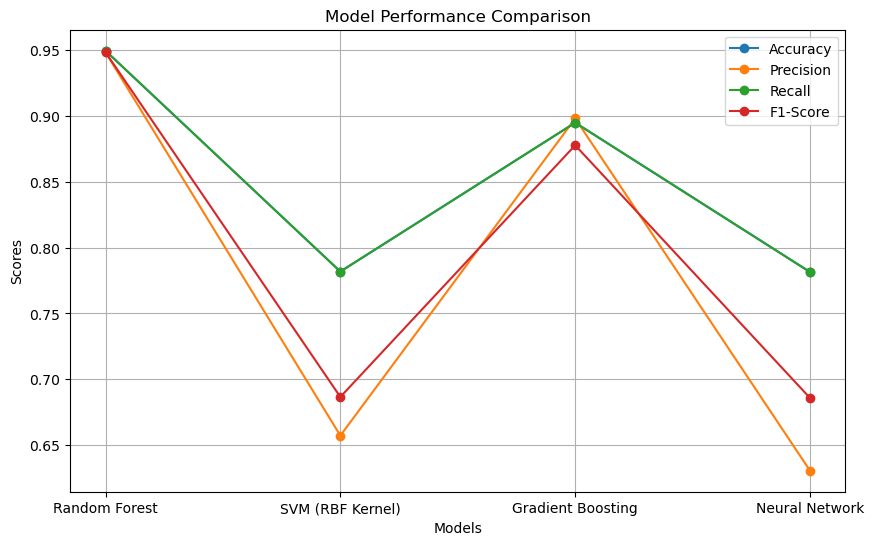

In [76]:
#Plotting the comparison graph
plt.figure(figsize=(10, 6))
for metric in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    plt.plot(results_df["Model"], results_df[metric], marker='o', label=metric)
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend()
plt.grid()
plt.show()